In [3]:
import strawberryfields as sf
from strawberryfields.ops import *
import numpy as np
from numpy import pi, sqrt

np.random.seed(42)
prog = sf.Program(3)

In [5]:
alpha = 1.0+0.5j
r = np.abs(alpha)
phi = np.angle(alpha)

with prog.context as q:
    Coherent(r,phi) | q[0]
    Squeezed(-2) | q[1]
    Squeezed(2) | q[2]
    
    BS = BSgate(pi/4, pi)
    BS | (q[1],q[2])
    BS | (q[0],q[1])

    MeasureX | q[0]
    MeasureP | q[1]

    Xgate(sqrt(2)*q[0].par) | q[2]
    Zgate(-sqrt(2)*q[1].par) | q[2]


eng = sf.Engine('fock', backend_options={"cutoff_dim":15})
result = eng.run(prog, shots=1, modes=None, compile_options={})
    

In [7]:
print(result.samples)

[[0.19890199 0.17330173]]


In [8]:
print(result.state)
state = result.state

<FockState: num_modes=3, cutoff=15, pure=False, hbar=2>


In [9]:
print(state.dm().shape)

(15, 15, 15, 15, 15, 15)


In [13]:
rho2 = np.einsum('kkllij->ij',state.dm())
print(rho2.shape)

(15, 15)


In [14]:
probs = np.real_if_close(np.diagonal(rho2))
print(rho2)

[[ 3.10694907e-01+3.65063058e-17j  3.01019602e-01-1.48337607e-01j
   1.56478176e-01-2.03278443e-01j  3.17745595e-02-1.56797600e-01j
  -2.29579292e-02-8.39641587e-02j -2.73976601e-02-3.25952289e-02j
  -1.88274519e-02-6.27810519e-03j -8.57843659e-03-4.99023291e-04j
  -4.93709783e-03-1.35856291e-03j -1.71817892e-04+7.25231667e-04j
   5.77258527e-03-3.74288387e-03j -8.79244977e-04+1.59765300e-03j
   9.67297245e-03+3.29309414e-03j -1.23733356e-03+1.74626992e-03j
  -1.90268784e-03+7.50157440e-03j]
 [ 3.01019602e-01+1.48337607e-01j  3.62467630e-01-2.96029222e-17j
   2.48658199e-01-1.22239525e-01j  1.05646232e-01-1.36744402e-01j
   1.78446944e-02-9.23104348e-02j -1.09822671e-02-4.46608743e-02j
  -1.52437419e-02-1.50715438e-02j -8.07304398e-03-4.57915634e-03j
  -4.13472260e-03-3.67341505e-03j -5.12720615e-04+6.20614914e-04j
   7.37981765e-03-8.70274727e-04j -1.61464506e-03+1.12811561e-03j
   7.79949899e-03+7.80879063e-03j -2.03253785e-03+1.10113931e-03j
  -5.42497446e-03+6.35955317e-03j]
 [ 1.5

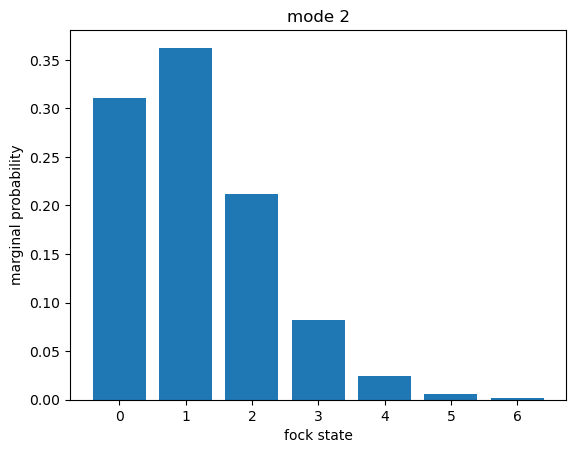

In [15]:
from matplotlib import pyplot as plt 
plt.bar(range(7),probs[:7])
plt.xlabel('fock state')
plt.ylabel('marginal probability')
plt.title('mode 2')
plt.show()